In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filePath = "/content/drive/MyDrive/Final/dataset1/fraudTrain.csv"
df = pd.read_csv(filePath)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.value_counts("is_fraud")

is_fraud
0    1474209
1       7706
Name: count, dtype: int64

<ipython-input-4-51365cda9714>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_fraud', data=df, palette='Set1')


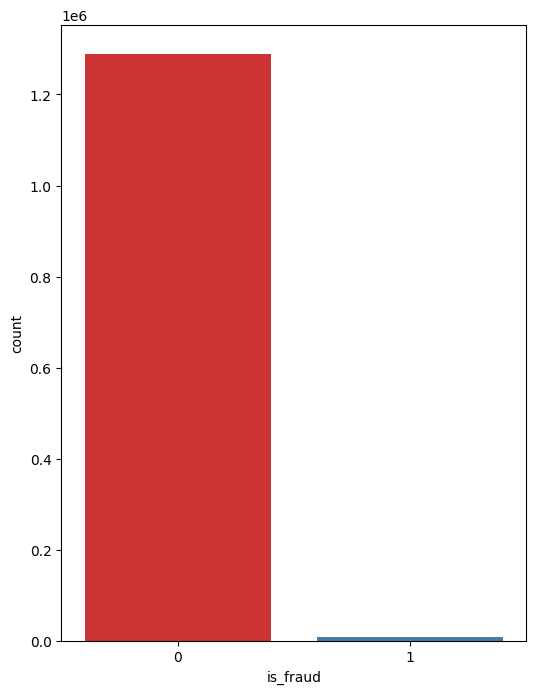

In [4]:
f,ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='is_fraud', data=df, palette='Set1')
plt.show()

In [7]:
7706 / (7706 + 1474209) * 100

1481915

In [ ]:
# Drop the 'trans_date_trans_time' column
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('trans_date_trans_time', axis=1)
df.rename(columns={'is_fraud': 'Class'}, inplace=True)
df.head()

,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,age,Class
0,0.014663,0.015927,0.003125,1.0,0.913292,0.132451,0.000300,0.004336,0.930886,0.143355,0.031250,0
1,0.002665,0.002229,0.000752,0.0,0.651832,0.008980,0.000087,0.004495,0.619573,0.019476,0.760417,0
2,0.002279,0.001568,0.001534,1.0,0.429365,0.707958,0.001834,0.006828,0.456351,0.710208,0.375000,0
3,0.001234,0.001880,0.003678,0.0,0.665419,0.642742,0.000727,0.003983,0.661527,0.628499,-0.031250,0
4,0.006705,0.006344,0.019995,1.0,0.418661,0.687787,0.000018,0.004107,0.429634,0.694310,0.593750,0


In [ ]:
from imblearn.over_sampling import SMOTE

# Assume that `df` is your DataFrame and 'Class' is your target variable

# Separate the features and the target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Define the SMOTE method
smote = SMOTE(sampling_strategy='minority')

# Apply the SMOTE method
X_smote, y_smote = smote.fit_resample(X, y)

# Convert the oversampled data back into a DataFrame
df = pd.DataFrame(X_smote, columns=X.columns)
df['Class'] = y_smote

In [ ]:
# 1. Split the dataset into a temporary training set and the test set
D_train_temp, D_test = train_test_split(df, test_size=0.2, stratify=df['Class'], random_state=42)

# 2. Split the temporary training set into the final training set and the validation set
D_train, T_valid   = train_test_split(D_train_temp, test_size=0.25, stratify=D_train_temp['Class'], random_state=42)
x_train = D_train.iloc[:, :-1]
y_train = D_train.iloc[:, -1]

x_test = D_test.iloc[:, :-1]
y_test = D_test.iloc[:, -1]

x_val = T_valid.iloc[:, :-1]
y_val = T_valid.iloc[:, -1]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))
print(classification_report(y_test, lr_model.predict(x_test), target_names=['Not fraud', 'Fraud']))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

   Not fraud       0.83      0.96      0.89    294842
       Fraud       0.95      0.80      0.87    294842

    accuracy                           0.88    589684
   macro avg       0.89      0.88      0.88    589684
weighted avg       0.89      0.88      0.88    589684



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))
print(classification_report(y_test, dtree.predict(x_test), target_names=['Not fraud', 'Fraud']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00    294842
       Fraud       1.00      1.00      1.00    294842

    accuracy                           1.00    589684
   macro avg       1.00      1.00      1.00    589684
weighted avg       1.00      1.00      1.00    589684



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(n_estimators=5, max_features='sqrt')

# Fit the model
rf_model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))

# Predict the test set results
y_pred = rf_model.predict(x_test)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Not fraud', 'Fraud'])

print("Classification Report: \n", report)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Classification Report: 
               precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00    294842
       Fraud       1.00      1.00      1.00    294842

    accuracy                           1.00    589684
   macro avg       1.00      1.00      1.00    589684
weighted avg       1.00      1.00      1.00    589684

